In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("df_voicemail_true.csv")
df.head()

,churn,accountlength,internationalplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
0,0,128.0,0,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1.0
1,0,107.0,0,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0
2,0,121.0,0,24.0,218.2,88.0,348.5,108.0,212.6,118.0,7.5,7.0,3.0
3,0,141.0,1,37.0,258.6,84.0,222.0,111.0,326.4,97.0,11.2,5.0,0.0
4,0,85.0,0,27.0,196.4,139.0,280.9,90.0,89.3,75.0,13.8,4.0,1.0


In [3]:
df.shape

(1323, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       1323 non-null   int64  
 1   accountlength               1323 non-null   float64
 2   internationalplan           1323 non-null   int64  
 3   numbervmailmessages         1323 non-null   float64
 4   totaldayminutes             1323 non-null   float64
 5   totaldaycalls               1323 non-null   float64
 6   totaleveminutes             1323 non-null   float64
 7   totalevecalls               1323 non-null   float64
 8   totalnightminutes           1323 non-null   float64
 9   totalnightcalls             1323 non-null   float64
 10  totalintlminutes            1323 non-null   float64
 11  totalintlcalls              1323 non-null   float64
 12  numbercustomerservicecalls  1323 non-null   float64
dtypes: float64(11), int64(2)
memory u

In [5]:
df.columns

Index(['churn', 'accountlength', 'internationalplan', 'numbervmailmessages',
       'totaldayminutes', 'totaldaycalls', 'totaleveminutes', 'totalevecalls',
       'totalnightminutes', 'totalnightcalls', 'totalintlminutes',
       'totalintlcalls', 'numbercustomerservicecalls'],
      dtype='object')

In [6]:
num_cols = ['accountlength', 'numbervmailmessages', 'totaldayminutes', 'totaldaycalls', 'totaleveminutes', 'totalevecalls', 'totalnightminutes', 'totalnightcalls', 'totalintlminutes', 'totalintlcalls', 'numbercustomerservicecalls']
cat_cols = ['internationalplan']

In [7]:
X = df.drop(columns = ['churn'])
y = df['churn']

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['GVIF'] = np.sqrt(vif['VIF'])
print(vif)

## Multicolinearity does not exist

                      Variable        VIF      GVIF
0                accountlength   7.141827  2.672420
1            internationalplan   1.117522  1.057129
2          numbervmailmessages  13.630076  3.691893
3              totaldayminutes  11.979813  3.461187
4                totaldaycalls  22.839705  4.779090
5              totaleveminutes  15.931947  3.991484
6                totalevecalls  22.852103  4.780387
7            totalnightminutes  15.545145  3.942733
8              totalnightcalls  22.174433  4.708974
9             totalintlminutes  13.785599  3.712896
10              totalintlcalls   4.076176  2.018954
11  numbercustomerservicecalls   2.408049  1.551789


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [10]:
X_train.head()

,accountlength,internationalplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
1062,131.0,0,29.0,42.1,114.0,183.3,70.0,158.7,82.0,10.0,1.0,0.0
479,17.0,0,35.0,198.5,123.0,270.6,74.0,209.9,130.0,8.1,10.0,1.0
724,147.0,1,35.0,157.5,109.0,189.6,67.0,227.0,76.0,11.1,2.0,3.0
40,115.0,0,24.0,142.1,124.0,183.4,129.0,164.8,114.0,9.6,4.0,1.0
22,128.0,0,29.0,179.3,104.0,225.9,86.0,323.0,78.0,8.6,7.0,0.0


In [11]:
# Scaling numerical columns and enncoding categorical columns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the Column Transformer
ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_cols)
    ],
    remainder='passthrough'  # Keep the categorical columns without transformation
)

# Pipeline for scaling numerical columns
pipeline = Pipeline([
    ('transformer', ct)
])

# Transform the training and test sets
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Convert transformed data to DataFrames
X_train = pd.DataFrame(X_train_transformed, columns=pipeline.get_feature_names_out())
X_test = pd.DataFrame(X_test_transformed, columns=pipeline.get_feature_names_out())

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1058, 12)
(265, 12)
(1058,)
(265,)


In [13]:
X_train.head()

,scaler__accountlength,scaler__numbervmailmessages,scaler__totaldayminutes,scaler__totaldaycalls,scaler__totaleveminutes,scaler__totalevecalls,scaler__totalnightminutes,scaler__totalnightcalls,scaler__totalintlminutes,scaler__totalintlcalls,scaler__numbercustomerservicecalls,remainder__internationalplan
0,0.774482,-0.044537,-2.632986,0.729371,-0.391603,-1.483732,-0.845845,-0.939080,-0.118412,-1.355010,-1.201039,0.0
1,-2.100525,0.715467,0.331457,1.187459,1.362065,-1.283975,0.175783,1.526551,-0.804978,2.218074,-0.410311,0.0
2,1.177992,0.715467,-0.445666,0.474878,-0.265049,-1.633549,0.516990,-1.247284,0.279073,-0.958001,1.171144,1.0
3,0.370972,-0.677873,-0.737562,1.238358,-0.389594,1.462680,-0.724127,0.704674,-0.262952,-0.163982,-0.410311,0.0
4,0.698824,-0.044537,-0.032464,0.220384,0.464139,-0.684705,2.432542,-1.144549,-0.624303,1.027046,-1.201039,0.0


# Without Smote

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
lr = LogisticRegression(random_state = 100)

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_lr)
print("Logistic Regression Accuracy: ", lr_accuracy*100)

Logistic Regression Accuracy:  92.0754716981132


In [16]:
## Hyperparameter Tuning with Cross-Validation for Logistic Regression

# Define hyperparameters for logistic regression
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Regularization type
    'C': [0.2, 0.3, 0.4], # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Solvers available for these penalties
}

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search_lr = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')

# Fit the model on the training data for hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

# Get the best estimator and hyperparameters
best_lr = grid_search_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)

# Evaluate training performance with best model
y_train_pred_lr = best_lr.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print("Logistic Regression Training Accuracy: ", train_accuracy_lr * 100)
lr_cls_train = classification_report(y_train, y_train_pred_lr)
print("Logistic Regression Classification Report for Train Set:\n", lr_cls_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Logistic Regression Parameters: {'C': 0.3, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression Training Accuracy:  93.00567107750473
Logistic Regression Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       978
           1       0.67      0.15      0.24        80

    accuracy                           0.93      1058
   macro avg       0.80      0.57      0.60      1058
weighted avg       0.91      0.93      0.91      1058



Logistic Regression Test Accuracy:  93.20754716981132


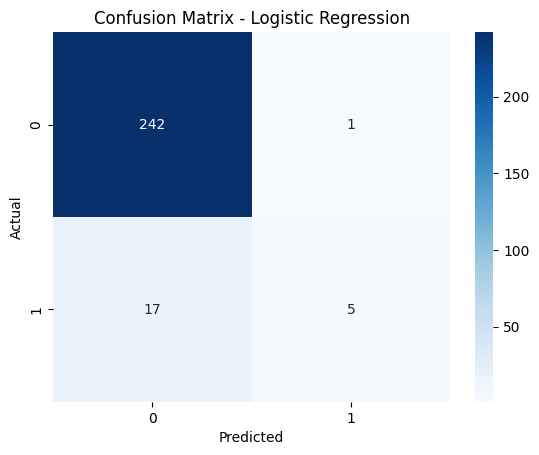

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       243
           1       0.83      0.23      0.36        22

    accuracy                           0.93       265
   macro avg       0.88      0.61      0.66       265
weighted avg       0.93      0.93      0.91       265



In [17]:
# Make predictions on the test set with the best model
y_pred_lr = best_lr.predict(X_test)

# Evaluate test performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cls = classification_report(y_test, y_pred_lr)

print("Logistic Regression Test Accuracy: ", lr_accuracy * 100)

sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("Logistic Regression Classification Report:\n", lr_cls)

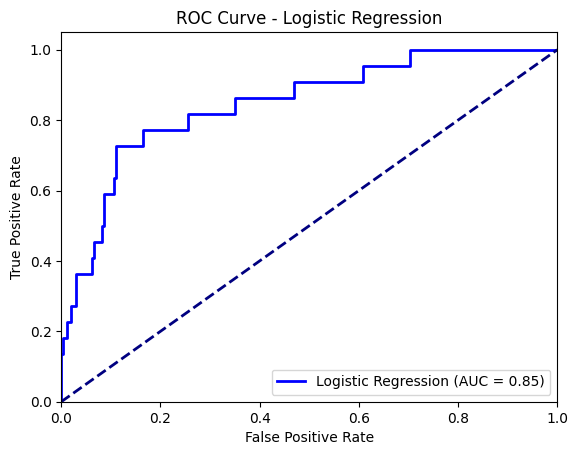

In [18]:
## ROC Curve

y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## SVM

In [23]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(probability=True, random_state=100)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: ", svm_accuracy*100)

SVM Accuracy:  91.69811320754717


In [24]:
## Hyperparameter Tuning with Cross-Validation for SVM

## Define grid
svm_params = {
    'C': [1, 2, 3],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
    'degree': [2, 3, 4] # Degree of the 'poly' kernel
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_svm = GridSearchCV(svm, svm_params, cv=3, verbose=1, n_jobs=-1, scoring='f1')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_svm = grid_search_svm.best_estimator_
print("Best SVM Parameters:", grid_search_svm.best_params_)

# Training performance
y_train_pred_svm = best_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Training Accuracy: ", train_accuracy_svm*100)
svm_cls_train = classification_report(y_train, y_train_pred_svm)
print("SVM Report for Train Set:\n", svm_cls_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best SVM Parameters: {'C': 2, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
SVM Training Accuracy:  97.16446124763705
Logistic Regression Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       978
           1       1.00      0.62      0.77        80

    accuracy                           0.97      1058
   macro avg       0.99      0.81      0.88      1058
weighted avg       0.97      0.97      0.97      1058



SVM Accuracy:  92.45283018867924


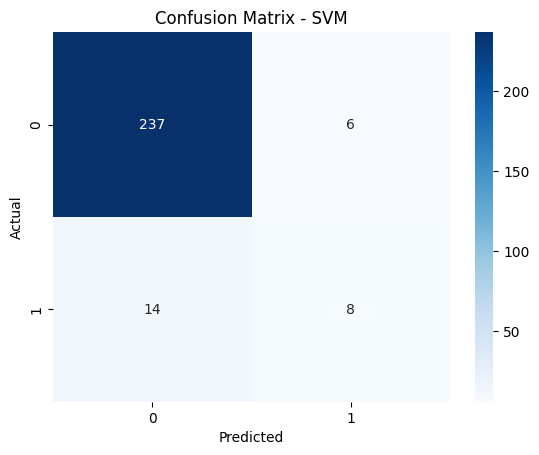

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       243
           1       0.57      0.36      0.44        22

    accuracy                           0.92       265
   macro avg       0.76      0.67      0.70       265
weighted avg       0.91      0.92      0.92       265



In [21]:
# Make predictions with the best model
y_pred_svm = best_svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cls = classification_report(y_test, y_pred_svm)

print("SVM Accuracy: ", svm_accuracy*100)

sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

print("SVM Classification Report:\n", svm_cls)

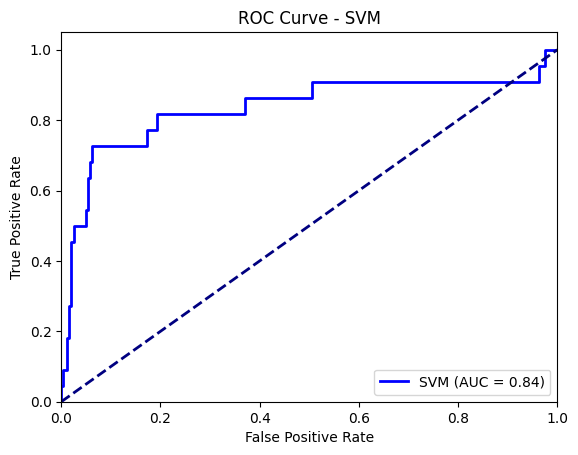

In [22]:
## ROC Curve

y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: ", knn_accuracy*100)

KNN Accuracy:  92.0754716981132


In [22]:
## Hyperparameter Tuning with Cross-Validation for KNN

knn_params = {
    'n_neighbors': [2, 3],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting of points
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']  # Distance metric
}

# Adjust `p` if `minkowski` metric is selected
if 'minkowski' in knn_params['metric']:
    knn_params['p'] = [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_knn = grid_search_knn.best_estimator_
print("Best KNN Parameters:", grid_search_knn.best_params_)

# Training performance
y_train_pred_knn = best_knn.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print("KNN Training Accuracy: ", train_accuracy_knn*100)
knn_cls_train = classification_report(y_train, y_train_pred_knn)
print("KNN Classification Report for Train Set:\n", knn_cls_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
KNN Training Accuracy:  100.0
Logistic Regression Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00        80

    accuracy                           1.00      1058
   macro avg       1.00      1.00      1.00      1058
weighted avg       1.00      1.00      1.00      1058



KNN Accuracy:  90.18867924528303


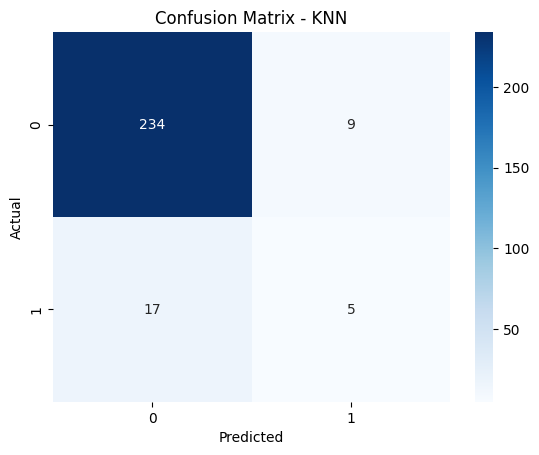

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       243
           1       0.36      0.23      0.28        22

    accuracy                           0.90       265
   macro avg       0.64      0.60      0.61       265
weighted avg       0.88      0.90      0.89       265



In [25]:
# Make predictions with the best model
y_pred_knn = best_knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_cls = classification_report(y_test, y_pred_knn)

print("KNN Accuracy: ", knn_accuracy*100)

sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

print("KNN Classification Report:\n", knn_cls)

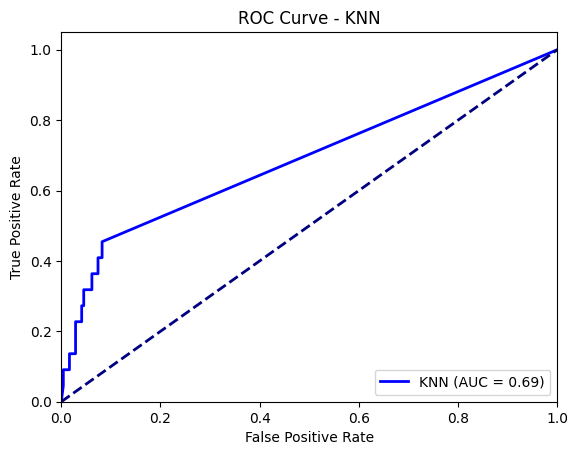

In [26]:
## ROC Curve

y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=100)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: ", dt_accuracy*100)

Decision Tree Accuracy:  92.83018867924528


In [28]:
## Hyperparameter Tuning with Cross-Validation for Decision Tree Classifier

dt_params = {
    'criterion': ['gini', 'entropy'], # Criterion for splitting
    'max_depth': [10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [10, 20, 30], # Minimum number of samples required to split
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required in a leaf node
    'max_features': [None], # Number of features to consider for the best split 
    'max_leaf_nodes': [None, 10, 20]
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_dt = GridSearchCV(dt, dt_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

# Training performance
y_train_pred_dt = best_dt.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print("Decision Tree Training Accuracy: ", train_accuracy_dt*100)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Decision Tree Training Accuracy:  97.63705103969754


Decision Tree Accuracy:  95.09433962264151


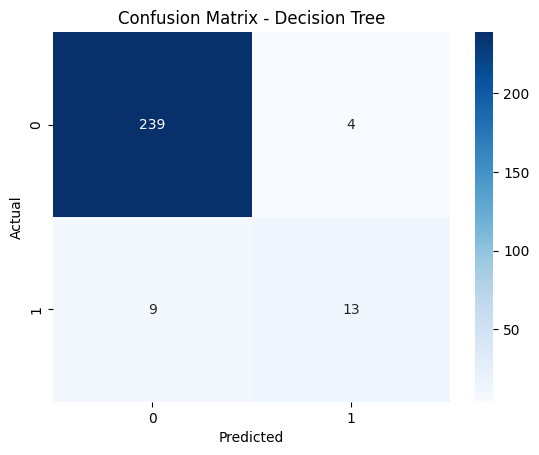

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       243
           1       0.76      0.59      0.67        22

    accuracy                           0.95       265
   macro avg       0.86      0.79      0.82       265
weighted avg       0.95      0.95      0.95       265



In [29]:
# Make predictions with the best model
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_cls = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy: ", dt_accuracy*100)

sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("Decision Tree Classification Report:\n", dt_cls)

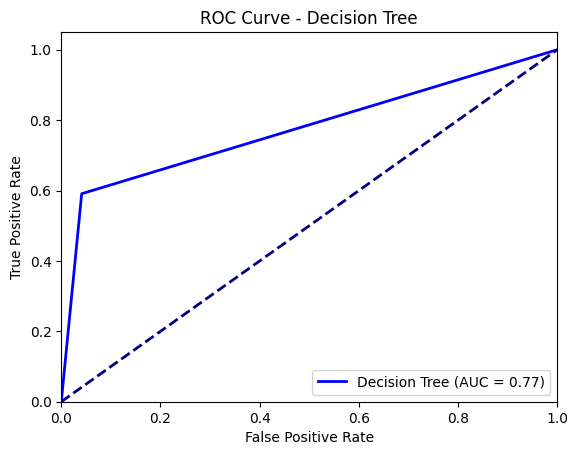

In [30]:
## ROC Curve

y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf = RandomForestClassifier(random_state=100)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: ", rf_accuracy*100)

Random Forest Classifier Accuracy:  93.58490566037736


In [32]:
## Hyperparameter Tuning with Cross-Validation for Random Forest

# Define hyperparameters for random forest
rf_params = {
    'n_estimators': [1000, 1200], # Number of trees restricted
    'max_depth': [10, 15], # Maximum depth of the tree
    'min_samples_split': [6, 8], # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 3],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, rf_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')

# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Training performance
y_train_pred_rf = best_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy: ", train_accuracy_rf*100)
rf_cls_train = classification_report(y_train, y_train_pred_rf)
print("Random Forest Classification Report for Train Set:\n", rf_cls_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1000}
Random Forest Training Accuracy:  98.01512287334594


Random Forest Classifier Accuracy:  93.20754716981132


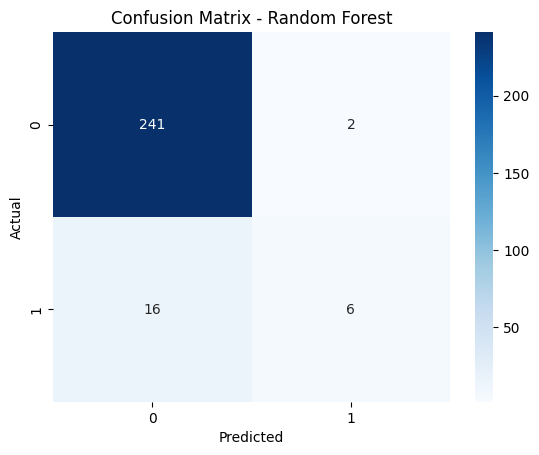

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       243
           1       0.75      0.27      0.40        22

    accuracy                           0.93       265
   macro avg       0.84      0.63      0.68       265
weighted avg       0.92      0.93      0.92       265



In [33]:
# Make predictions with the best model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_cm = confusion_matrix(y_test, y_pred_best_rf)
rf_cls = classification_report(y_test, y_pred_best_rf)

print("Random Forest Classifier Accuracy: ", rf_accuracy*100)

sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("Random Forest Classifier Classification Report:\n", rf_cls)

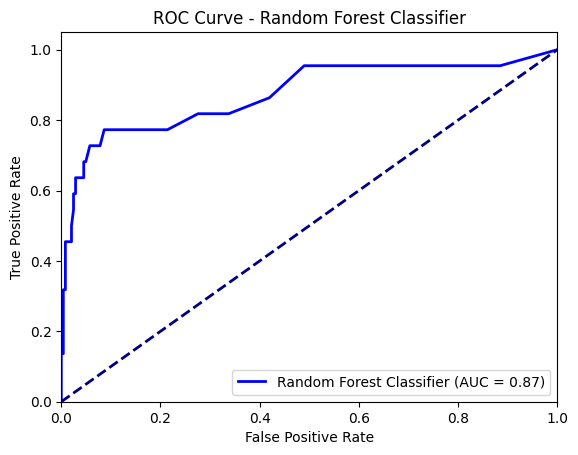

In [34]:
## ROC Curve

y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest Classifier (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy: ", gnb_accuracy*100)

Gaussian Naive Bayes Accuracy:  86.41509433962264


In [36]:
## Hyperparameter Tuning with Cross-Validation for Gaussian Naive Bayes

# Define hyperparameters for GNB
gnb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.001, 0.01]  # Control smoothing applied to variance estimates
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_gnb = GridSearchCV(gnb, gnb_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_gnb.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_gnb = grid_search_gnb.best_estimator_
print("Best GNB Parameters:", grid_search_gnb.best_params_)

# Training performance
y_train_pred_gnb = gnb.predict(X_train)
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
print("Gaussian Naive Bayes Training Accuracy: ", train_accuracy_gnb*100)
gnb_cls_train = classification_report(y_train, y_train_pred_gnb)
print("Gaussian Naive Bayes Classification Report for Train Set:\n", gnb_cls_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best GNB Parameters: {'var_smoothing': 1e-09}
Gaussian Naive Bayes Training Accuracy:  90.54820415879017


Gaussian Naive Bayes Accuracy:  86.41509433962264


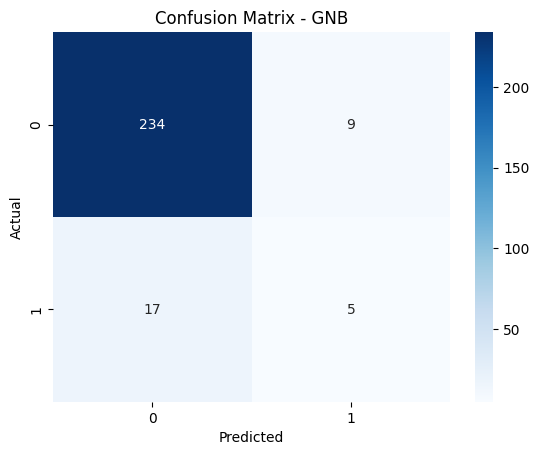

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       243
           1       0.29      0.45      0.36        22

    accuracy                           0.86       265
   macro avg       0.62      0.68      0.64       265
weighted avg       0.89      0.86      0.88       265



In [37]:
# Make predictions with the best model
y_pred_gnb = best_gnb.predict(X_test)

# Evaluate the model
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_cm = confusion_matrix(y_test, y_pred_gnb)
gnb_cls = classification_report(y_test, y_pred_gnb)

print("Gaussian Naive Bayes Accuracy: ", gnb_accuracy*100)

sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GNB')
plt.show()

print("Gaussian Naive Bayes Classification Report:\n", gnb_cls)

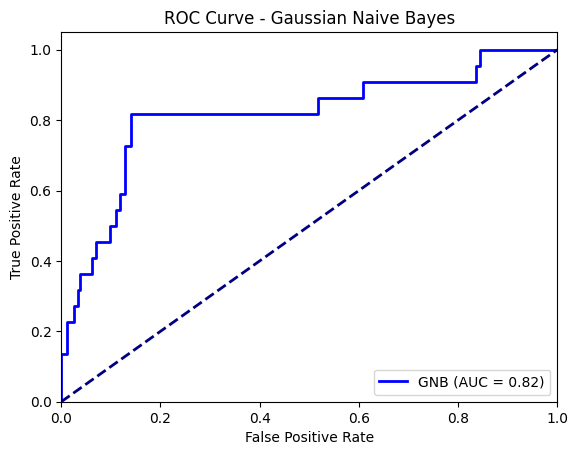

In [38]:
## ROC Curve

y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label='GNB (AUC = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## LightGBM

In [39]:
from lightgbm import LGBMClassifier

# Initialize the LGBMClassifier model
lgbm = LGBMClassifier(random_state=100, force_col_wise=True)

# Train the model
lgbm.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy: ", lgbm_accuracy*100)

[LightGBM] [Info] Number of positive: 80, number of negative: 978
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 1058, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.075614 -> initscore=-2.503483
[LightGBM] [Info] Start training from score -2.503483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy:  94.71698113207547


In [40]:
## Hyperparameter Tuning with Cross-Validation for LightGBM

# Define the hyperparameter grid for LightGBM
lgbm_params = {
    'num_leaves': [50, 60],            # Max number of leaves
    'learning_rate': [0.01, 0.05],     # Learning rate
    'n_estimators': [1200, 1300],        # Number of boosting rounds
    'min_child_samples': [60, 70],      # Minimum number of data points in a leaf
    'max_depth': [5, 7],                  # Tree depth
    'reg_alpha': [0.01, 0.1],             # L1 regularization
    'reg_lambda': [0.01, 0.1],            # L2 regularization
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_lgbm = GridSearchCV(lgbm, lgbm_params, cv=2, verbose=1, n_jobs=-1, scoring='f1')
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_lgbm = grid_search_lgbm.best_estimator_
print("Best LightGBM Parameters:", grid_search_lgbm.best_params_)

# Training performance
y_train_pred_lgbm = best_lgbm.predict(X_train)
train_accuracy_lgbm = accuracy_score(y_train, y_train_pred_lgbm)
print("LightGBM Training Accuracy: ", train_accuracy_lgbm*100)
lgbm_cls_train = classification_report(y_train, y_train_pred_lgbm)
print("LightGBM Classification Report for Train Set:\n", lgbm_cls_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits
[LightGBM] [Info] Number of positive: 80, number of negative: 978
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 1058, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.075614 -> initscore=-2.503483
[LightGBM] [Info] Start training from score -2.503483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

LightGBM Accuracy:  94.71698113207547


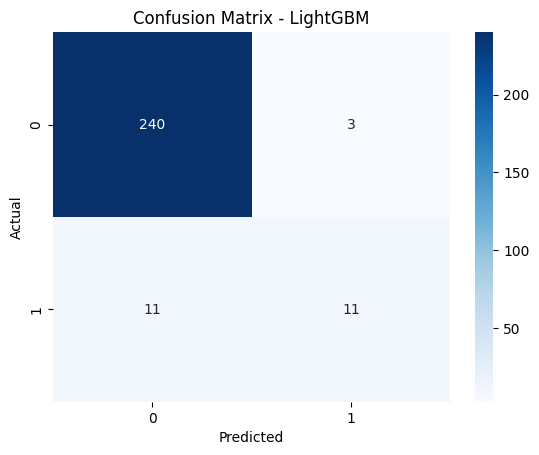

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       243
           1       0.79      0.50      0.61        22

    accuracy                           0.95       265
   macro avg       0.87      0.74      0.79       265
weighted avg       0.94      0.95      0.94       265



In [41]:
# Make predictions with the best model
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_cm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_cls = classification_report(y_test, y_pred_lgbm)

print("LightGBM Accuracy: ", lgbm_accuracy*100)

sns.heatmap(lgbm_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

print("LightGBM Classification Report:\n", lgbm_cls)

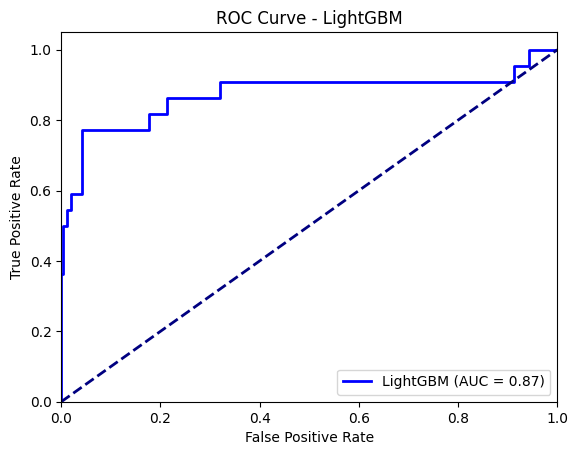

In [42]:
## ROC Curve

y_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lgbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

## AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada = AdaBoostClassifier(random_state=100)

# Train the model
ada.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy: ", ada_accuracy*100)

AdaBoost Accuracy:  92.0754716981132


In [44]:
## Hyperparameter Tuning with Cross-Validation for AdaBoost Classifier

# Define hyperparameters for AdaBoost
ada_params = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01, 0.05],
    'algorithm': ['SAMME.R']
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_ada = GridSearchCV(ada, ada_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_ada.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_ada = grid_search_ada.best_estimator_
print("Best AdaBoost Parameters:", grid_search_ada.best_params_)

# Training performance
y_train_pred_ada = best_ada.predict(X_train)
train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
print("AdaBoost Training Accuracy: ", train_accuracy_ada*100)
ada_cls_train = classification_report(y_train, y_train_pred_ada)
print("AdaBoost Classification Report for Train Set:\n", ada_cls_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best AdaBoost Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 500}
AdaBoost Training Accuracy:  94.1398865784499


AdaBoost Accuracy:  92.45283018867924


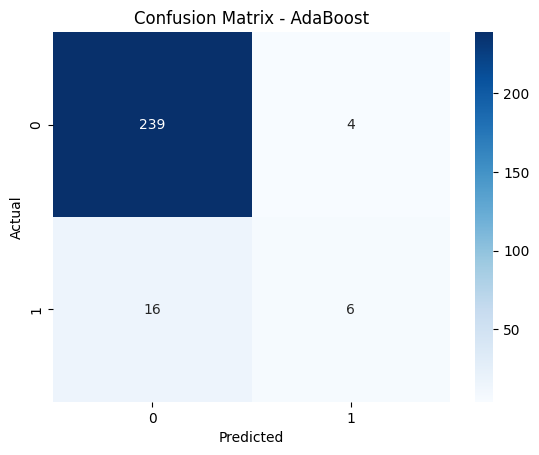

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       243
           1       0.60      0.27      0.38        22

    accuracy                           0.92       265
   macro avg       0.77      0.63      0.67       265
weighted avg       0.91      0.92      0.91       265



In [45]:
# Make predictions with the best model
y_pred_ada = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_cm = confusion_matrix(y_test, y_pred_ada)
ada_cls = classification_report(y_test, y_pred_ada)

print("AdaBoost Accuracy: ", ada_accuracy*100)

sns.heatmap(ada_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

print("AdaBoost Classification Report:\n", ada_cls)

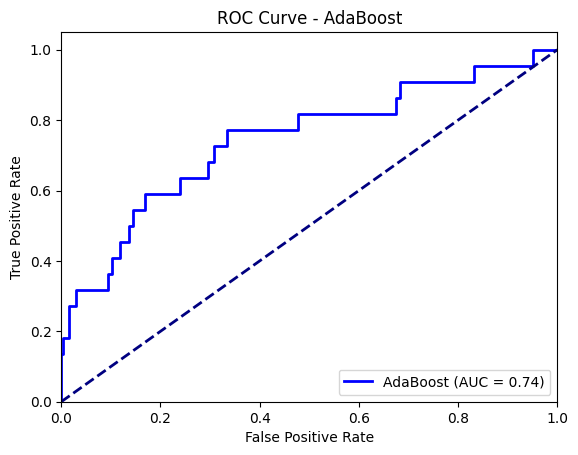

In [46]:
## ROC Curve

y_prob_ada = ada.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure()
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [47]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=100, eval_metric='logloss')

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy: ", xgb_accuracy*100)

XGBoost Classifier Accuracy:  95.47169811320755


In [48]:
## Hyperparameter Tuning with Cross-Validation for XGBoost Classifier

# Define the hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [3000, 4000], # Number of boosting rounds (trees)
    'max_depth': [5, 7], # Maximum depth of a tree
    'learning_rate': [0.01, 0.05], # Step size for each boosting step
    'subsample': [1], # Subsampling of the training data per tree
    'colsample_bytree': [0.9, 1], # Fraction of features to consider for each tree
    'gamma': [0.1], # Minimum loss reduction to create a split
    'reg_alpha': [0.1], # L1 regularization term
    'reg_lambda': [1] # L2 regularization term
}

# Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# Fit the model on the training data with hyperparameter tuning
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best estimator after tuning
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters from Grid Search:", grid_search_xgb.best_params_)

# Training performance
y_train_pred_xgb = best_xgb.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print("XGBoost Training Accuracy: ", train_accuracy_xgb*100)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters from Grid Search: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 3000, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1}
XGBoost Training Accuracy:  100.0


XGBoost Accuracy:  95.09433962264151


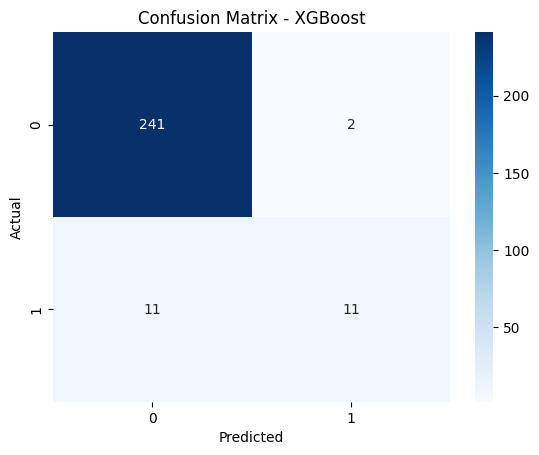

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       243
           1       0.85      0.50      0.63        22

    accuracy                           0.95       265
   macro avg       0.90      0.75      0.80       265
weighted avg       0.95      0.95      0.95       265



In [49]:
# Make predictions on the test set using the best model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model
xgb_best_accuracy = accuracy_score(y_test, y_pred_best_xgb)
xgb_best_cm = confusion_matrix(y_test, y_pred_best_xgb)
xgb_best_cls = classification_report(y_test, y_pred_best_xgb)

print("XGBoost Accuracy: ", xgb_best_accuracy*100)

sns.heatmap(xgb_best_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

print("XGBoost Classification Report:\n", xgb_best_cls)

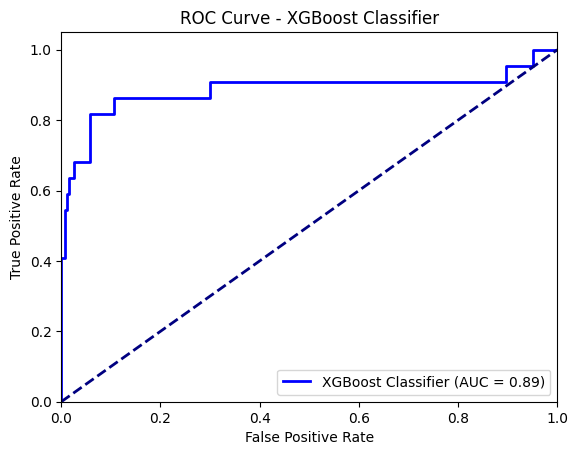

In [50]:
## ROC Curve

y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost Classifier (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=100)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print("GBM Classifier Accuracy: ", gbm_accuracy * 100)

In [ ]:
## Hyperparameter Tuning with Cross-Validation for GBM

# Define the hyperparameter grid for GBM
gbm_params = {
    'n_estimators': [100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 5],         # Maximum depth of a tree
    'learning_rate': [0.05, 0.1], # Step size for each boosting step
    'subsample': [0.8, 1.0],     # Subsampling of the training data per tree
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 3]    # Minimum samples in a leaf node
}

# Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=gbm_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# Fit the model on the training data with hyperparameter tuning
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters and the best estimator after tuning
best_gbm = grid_search_gbm.best_estimator_
print("Best Parameters from Grid Search:", grid_search_gbm.best_params_)

# Training performance
y_train_pred_gbm = best_gbm.predict(X_train)
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)
print("GBM Training Accuracy: ", train_accuracy_gbm * 100)
gbm_cls_train = classification_report(y_train, y_train_pred_gbm)
print("GBM Classification Report for Train Set:\n", gbm_cls_train)

In [ ]:
# Make predictions on the test set using the best model
y_pred_best_gbm = best_gbm.predict(X_test)

# Evaluate the model
gbm_best_accuracy = accuracy_score(y_test, y_pred_best_gbm)
gbm_best_cm = confusion_matrix(y_test, y_pred_best_gbm)
gbm_best_cls = classification_report(y_test, y_pred_best_gbm)

print("GBM Accuracy: ", gbm_best_accuracy * 100)

# Confusion matrix visualization for test set
sns.heatmap(gbm_best_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBM')
plt.show()

print("GBM Classification Report:\n", gbm_best_cls)

In [ ]:
## ROC Curve

y_prob_gbm = best_gbm.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_prob_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label='GBM Classifier (AUC = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GBM Classifier')
plt.legend(loc="lower right")
plt.show()

## Multi-Layer Perceptron (MLP)

In [51]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp = MLPClassifier(random_state=100)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy: ", mlp_accuracy*100)

MLP Accuracy:  93.20754716981132


In [52]:
## Hyperparameter Tuning with Cross-Validation for MLP

mlp_params = {
    'hidden_layer_sizes': [(100, 100), (250, 200)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0001],
    'momentum': [0.8, 0.9]
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_mlp = GridSearchCV(mlp, mlp_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_mlp = grid_search_mlp.best_estimator_
print("Best MLP Parameters:", grid_search_mlp.best_params_)

# Training performance
y_train_pred_mlp = best_mlp.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
print("MLP Training Accuracy: ", train_accuracy_mlp*100)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best MLP Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'momentum': 0.8, 'solver': 'adam'}
MLP Training Accuracy:  99.14933837429112


MLP Accuracy:  90.9433962264151


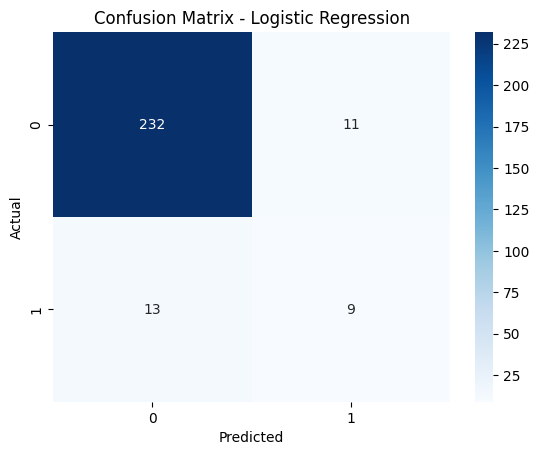

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       243
           1       0.45      0.41      0.43        22

    accuracy                           0.91       265
   macro avg       0.70      0.68      0.69       265
weighted avg       0.91      0.91      0.91       265



In [53]:
# Make predictions with the best model
y_pred_mlp = best_mlp.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_cm = confusion_matrix(y_test, y_pred_mlp)
mlp_cls = classification_report(y_test, y_pred_mlp)

print("MLP Accuracy: ", mlp_accuracy*100)

sns.heatmap(mlp_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("MLP Classification Report:\n", mlp_cls)

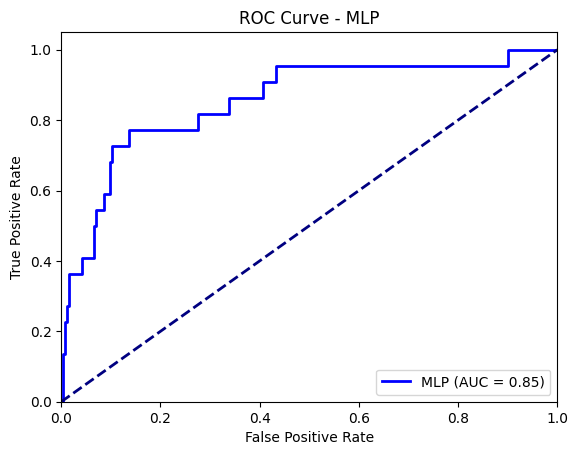

In [54]:
## ROC Curve

y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc="lower right")
plt.show()

## Display Performance Metrics Table for Models

In [55]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

# Dictionary to store model performances
model_performance = {
    'Model': [],
    'F1_Score': [],
    'Precision': [],
    'Recall': []
}

# List of models (using fitted best_* models from previous tuning)
models = {
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'Gaussian Naive Bayes': best_gnb,
    'LightGBM': best_lgbm,
    'AdaBoost': best_ada,
    'XGBoost': best_xgb,
    'MLP': best_mlp,
}

# Calculate performance metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    model_performance['Model'].append(model_name)
    model_performance['F1_Score'].append(f1)
    model_performance['Precision'].append(precision)
    model_performance['Recall'].append(recall)

# Convert to a DataFrame
performance_df = pd.DataFrame(model_performance)

# Sort the DataFrame by F1 Score in descending order
performance_df = performance_df.sort_values(by='F1_Score', ascending=False)

# Display the table
print(performance_df)

                  Model  F1_Score  Precision    Recall
3         Decision Tree  0.666667   0.764706  0.590909
8               XGBoost  0.628571   0.846154  0.500000
6              LightGBM  0.611111   0.785714  0.500000
1                   SVM  0.444444   0.571429  0.363636
9                   MLP  0.428571   0.450000  0.409091
4         Random Forest  0.400000   0.750000  0.272727
7              AdaBoost  0.375000   0.600000  0.272727
0   Logistic Regression  0.357143   0.833333  0.227273
5  Gaussian Naive Bayes  0.357143   0.294118  0.454545
2                   KNN  0.277778   0.357143  0.227273


## From the above models XGBoost performs best

## From the above models Decision Tree performs best

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Training Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       978
           1       0.97      0.71      0.82        80

    accuracy                           0.98      1058
   macro avg       0.97      0.86      0.90      1058
weighted avg       0.98      0.98      0.97      1058

Testing Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       243
           1       0.76      0.59      0.67        22

    accuracy                           0.95       265
   macro avg       0.86      0.79      0.82       265
weighted avg       0.95      0.95      0.95       265



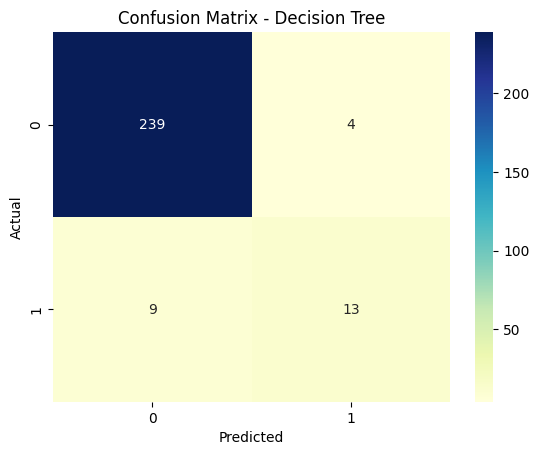

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the base Decision Tree model
base_model = DecisionTreeClassifier(random_state=100)

# Define hyperparameters for tuning
dt_params = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [10, 20, 30], # Minimum number of samples required to split
    'min_samples_leaf': [5, 10, 15],   # Minimum number of samples required in a leaf node
    'max_features': [None],            # Number of features to consider for the best split 
    'max_leaf_nodes': [None, 10, 20]
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_dt = GridSearchCV(base_model, dt_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_dt.predict(X_test)
y_pred_train = best_dt.predict(X_train)

# Evaluate on the training data
print("Training Report")
print(classification_report(y_train, y_pred_train))

# Evaluate on the test data
print("Testing Report")
print(classification_report(y_test, y_pred_test))

# Plot the confusion matrix for the test set
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

## Model Explainability

Feature Importances:
                                Feature  Importance
0                scaler__accountlength    0.000000
1          scaler__numbervmailmessages    0.000000
3                scaler__totaldaycalls    0.000000
5                scaler__totalevecalls    0.000000
6            scaler__totalnightminutes    0.000000
7              scaler__totalnightcalls    2.313156
4              scaler__totaleveminutes    4.564145
2              scaler__totaldayminutes   12.206576
8             scaler__totalintlminutes   13.465599
9               scaler__totalintlcalls   18.335256
10  scaler__numbercustomerservicecalls   23.921063
11        remainder__internationalplan   25.194204


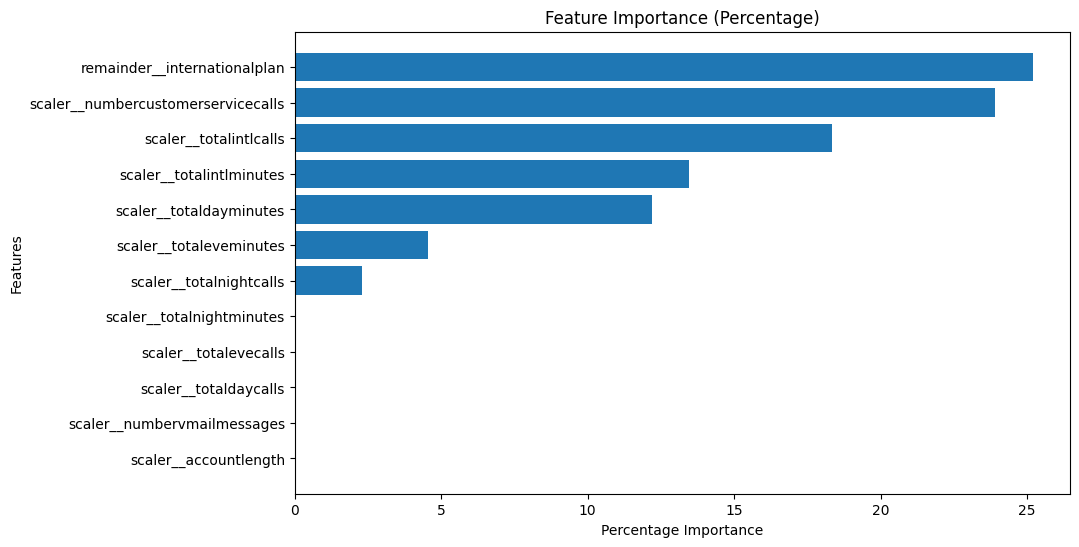

In [57]:
# Feature Importance Analysis
feature_importances = best_dt.feature_importances_

# Convert to percentage
importance_percentage = 100.0 * (feature_importances / feature_importances.sum())

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importance_percentage
})

# Sort by importance for better visualization
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Print feature importance percentages
print("Feature Importances:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Percentage Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Percentage)')
plt.show()

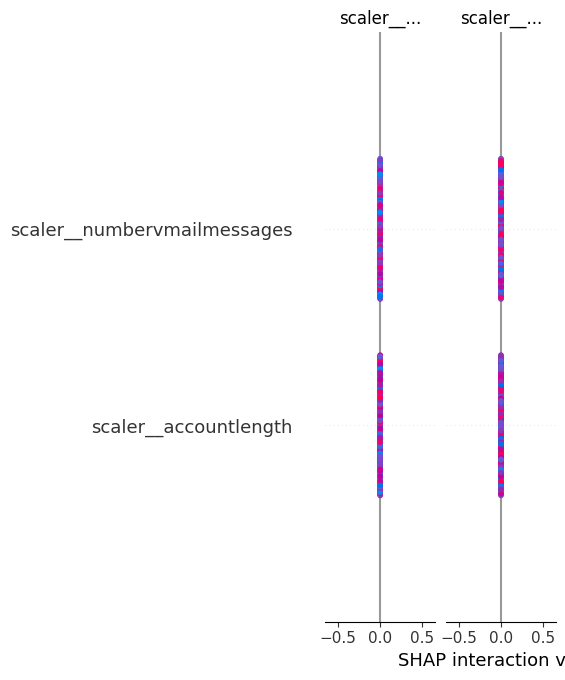

In [58]:
#Using SHAP Values
import shap

explainer = shap.Explainer(best_dt, X_train)  # Initialize SHAP explainer with training data
shap_values = explainer.shap_values(X_test)   # Calculate SHAP values for the test set

# SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

In [59]:
X_test.columns

Index(['scaler__accountlength', 'scaler__numbervmailmessages',
       'scaler__totaldayminutes', 'scaler__totaldaycalls',
       'scaler__totaleveminutes', 'scaler__totalevecalls',
       'scaler__totalnightminutes', 'scaler__totalnightcalls',
       'scaler__totalintlminutes', 'scaler__totalintlcalls',
       'scaler__numbercustomerservicecalls', 'remainder__internationalplan'],
      dtype='object')

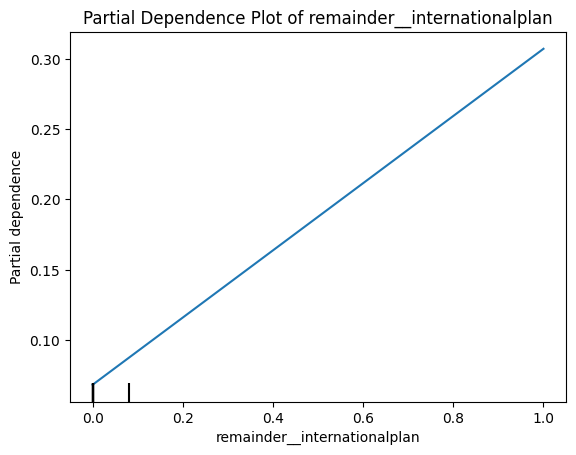

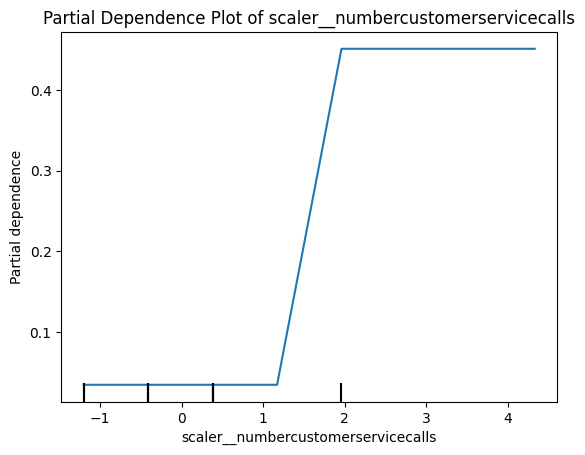

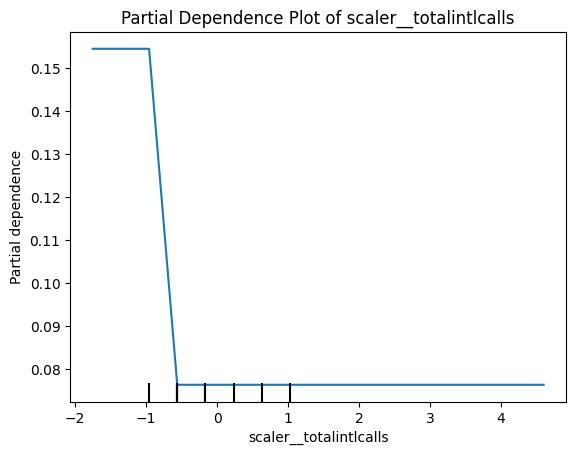

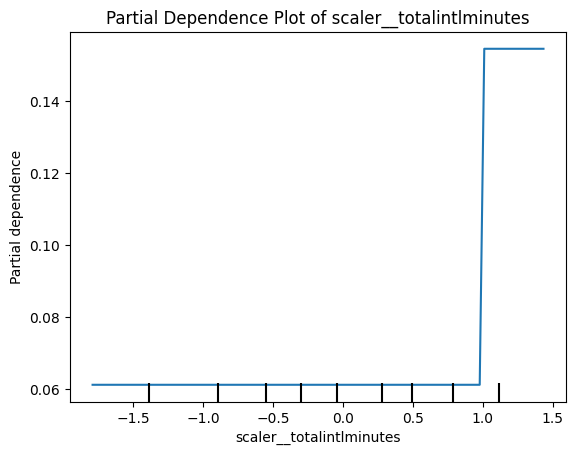

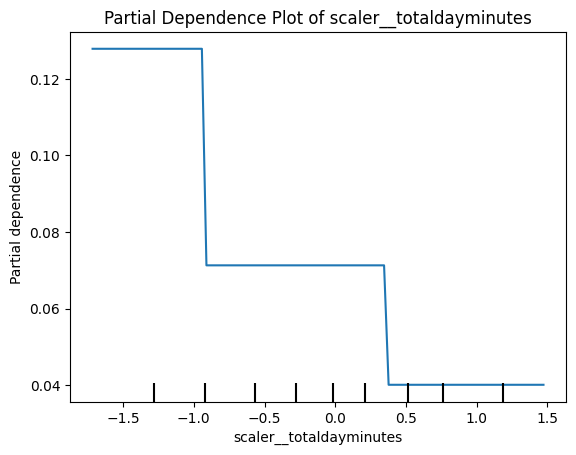

In [60]:
# Partial Dependence Plots for the most important features
from sklearn.inspection import PartialDependenceDisplay
best_ft = ['remainder__internationalplan', 'scaler__numbercustomerservicecalls', 'scaler__totalintlcalls', 'scaler__totalintlminutes', 'scaler__totaldayminutes']

for col in best_ft:
    PartialDependenceDisplay.from_estimator(best_dt, X_test, features=[col])
    plt.title(f"Partial Dependence Plot of {col}")
    plt.show()